학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개
y 데이터 값 : 5
변환된 y 데이터 값 : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

Epoch 00001: val_loss improved from inf to 0.15302, saving model to ../model/15/01_0.1530.hdf5

Epoch 00002: val_loss improved from 0.15302 to 0.10564, saving model to ../model/15/02_0.1056.hdf5

Epoch 00003: val_loss improved from 0.10564 to 0.08177, saving model to ../model/15/03_0.0818.hdf5

Epoch 00004: val_loss improved from 0.08177 to 0.07552, saving model to ../model/15/04_0.0755.hdf5

Epoch 00005: val_loss improved from 0.07552 to 0.06802, saving model to ../model/15/05_0.0680.hdf5

Epoch 00006: val_loss improved from 0.06802 to 0.06740, saving model to ../model/15/06_0.0674.hdf5

Epoch 00007: val_loss improved from 0.06740 to 0.06097, saving model to ../model/15/07_0.0610.hdf5

Epoch 00008: val_loss did not improve from 0.06097

Epoch 00009: val_loss improved from 0.06097 to 0.06059, saving model to ../model/15/09_0.0606.hdf5

Epoch 00010: val_loss did not improve from 0.06059



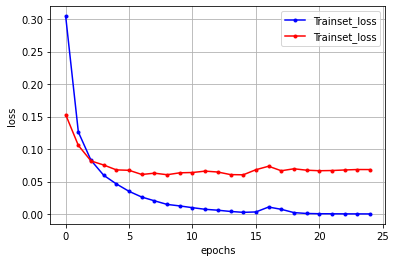

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.utils as np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import warnings
warnings.filterwarnings('ignore')

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('학습셋 이미지 수 : %d 개' % (X_train.shape[0]))
print('테스트셋 이미지 수 : %d 개' % (X_test.shape[0]))

# 가로 28, 세로 28 2차원 배열 -> 784개 1차원 배열로 변환
X_train = X_train.reshape(X_train.shape[0], 784) # reshape(총 샘플수, 1차원 속성의 수)
# 데이터 타입 실수형으로 변환
X_train = X_train.astype('float32')
# 0~255까지의 정수의 데이터를 정규화를 위해 255로 나눔
X_train = X_train / 255

# test 데이터에도 변환 동일 적용
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255


# y 데이터값 확인
print('y 데이터 값 : %d' % (y_train[0]))

# y값 바이너리 변환
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# 바이너리 변환된 y 데이터값 확인
print('변환된 y 데이터 값 :', y_train[0])


# 입력값 784개, 은닉층 512개, 출력 10개 모델
# 활성화 함수 - 은닉층(relu), 출력층(softmax)
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# 모델 저장 폴더 설정
MODEL_DIR = '../model/15/'

# 해당 경로의 폴더가 없을 경우 생성
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)   
modelpath = '../model/15/{epoch:02d}_{val_loss:.4f}.hdf5'

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer]
)

print('\n Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))


# 학습셋 오차
y_loss = hist.history['loss']
# 테스트셋 오차
y_vloss = hist.history['val_loss']

# 그래프
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.plot(x_len, y_vloss, marker='.', c='red', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()

plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()